In [2]:
import numpy as np
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
digits = datasets.load_digits(n_class = 6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

# Scale and visualize the embedding vectors

In [13]:
def plot_embedding(X, title = None, annotation = False):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                color = plt.cm.Set1(y[i] / 6.),
                fontdict = {'weight': 'bold', 'size': 9})
        if (annotation):
            if hasattr(offsetbox, 'AnnotationBbox'):
                shown_images = np.array([[1., 1.]])
                for i in range(X.shape[0]):
                    dist = np.sum((X[i] - shown_images) ** 2, 1)
                    if np.min(dist) < 4e-3:
                        # don't show points that are too close
                        continue
                    shown_images = np.r_[shown_images, [X[i]]]
                    imagebox = offsetbox.AnnotationBbox(
                        offsetbox.OffsetImage(digits.images[i], cmap = plt.cm.gray_r),
                        x[i])
                    ax.add_artist(imagebox)
        plt.xticks([]), plt.yticks([])
        if title is not None:
            plt.title(title)
    plt.savefig('projection.jpg')

# Plot images of the digits

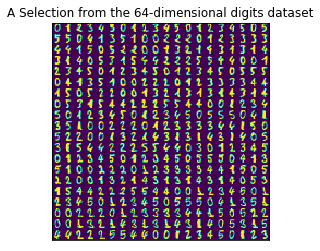

In [16]:
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('A Selection from the 64-dimensional digits dataset')
plt.savefig('digits.jpg')

# Use PCA to reduce dimension to 2

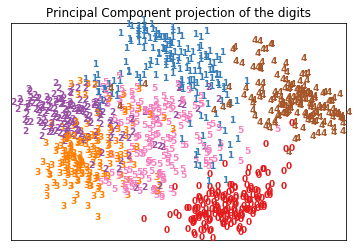

In [17]:
X_pca = decomposition.PCA(n_components = 2).fit_transform(X)
plot_embedding(X_pca, 'Principal Component projection of the digits')